Sharkattack assignment

Take this dataset: https://www.kaggle.com/felipeesc/shark-attack-dataset(opens in a new tab). Use all the skills you've learned up until now to answer the following questions as well as possible.

1 What are the most dangerous types of sharks to humans?

2 Are children more likely to be attacked by sharks?

3 Are shark attacks where sharks were provoked more or less dangerous?

4 Are certain activities more likely to result in a shark attack?

If you feel you can't answer a question based on the dataset alone, feel free to find other datasets and use them in answering the questions.

For each answer you give not only answer the question but also write about the assumptions you made in answering the question. If an assumption or decision possibly created a bias please write about this as well.


In [2]:
import pandas as pd
import numpy as np

In [3]:
url='https://github.com/ayuksekdag/winacademy_python_dna/blob/main/sharkattack/attacks.csv'
ds_shark_raw = pd.read_csv(url, delimiter=',', encoding='latin1')

ParserError: ignored

In [ ]:
ds_shark_raw.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [ ]:
#some columns have spaces remove by renaming (strpping) all spaces
ds_shark_raw.columns = ds_shark_raw.columns.str.replace(' ', '')

In [ ]:
ds_shark_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseNumber            8702 non-null   object 
 1   Date                  6302 non-null   object 
 2   Year                  6300 non-null   float64
 3   Type                  6298 non-null   object 
 4   Country               6252 non-null   object 
 5   Area                  5847 non-null   object 
 6   Location              5762 non-null   object 
 7   Activity              5758 non-null   object 
 8   Name                  6092 non-null   object 
 9   Sex                   5737 non-null   object 
 10  Age                   3471 non-null   object 
 11  Injury                6274 non-null   object 
 12  Fatal(Y/N)            5763 non-null   object 
 13  Time                  2948 non-null   object 
 14  Species               3464 non-null   object 
 15  InvestigatororSourc

Question1: What are the most dangerous types of sharks to humans?

Assumption: In answering this I made the assumption that would be highest count on the specie and fatal(Y/N)
Cleansing: observations have  been removed for unfilled observations. categorizing has been done for specie

Answer: White Shark attacks humans the most also with the hightest fatal


In [37]:
# data cleansing question 1
# step1 remove empty Species. and useless other observations
# Those records are useless

prep1 = ds_shark_raw.dropna(subset=['Species'])
prep1 = prep1[~prep1['Species'].str.contains('invalid', case =False)]


#step 2 replace values for right category
prep1.loc[prep1['Species'].str.contains('white', case=False), 'Species' ] = 'White Shark'
prep1.loc[prep1['Species'].str.contains('tiger', case=False), 'Species'] = 'Tiger Shark'
prep1.loc[prep1['Species'].str.contains('blue', case=False), 'Species'] = 'Blue Shark'
prep1.loc[prep1['Species'].str.contains('bull', case=False), 'Species'] = 'Bull Shark'
prep1.loc[prep1['Species'].str.contains('dusky', case=False), 'Species'] = 'Dusky Shark'
prep1.loc[prep1['Species'].str.contains('grey', case=False), 'Species'] = 'Grey Nurse Shark'
prep1.loc[prep1['Species'].str.contains('gummy', case=False), 'Species'] = 'Gummy Shark'
prep1.loc[prep1['Species'].str.contains('nurse', case=False), 'Species'] = 'Grey Nurse Shark'
prep1.loc[prep1['Species'].str.contains('hammer', case=False), 'Species'] = 'Hammerhead Shark'
prep1.loc[prep1['Species'].str.contains('dog', case=False), 'Species'] = 'Piked Spurdog'

prep1.loc[prep1['Species'].str.contains('not cofirmed', case=False), 'Species'] = 'Unknown'
prep1.loc[prep1['Species'].str.contains('unconfirmed', case=False), 'Species'] = 'Unknown'

# category filled ok for 85% observation
(prep1.groupby(['Species']).size().sort_values(ascending=[False]).head(10))

# cotegory filled ok for 90%
#(prep1.groupby(['Fatal(Y/N)']).size().sort_values(ascending=[False]).head(10))

#prep1.info()


Species
White Shark                                           667
Tiger Shark                                           283
Bull Shark                                            178
Grey Nurse Shark                                      122
Shark involvement prior to death was not confirmed    105
Shark involvement not confirmed                        88
Unknown                                                75
Blue Shark                                             56
Hammerhead Shark                                       48
4' shark                                               40
dtype: int64

<Axes: title={'center': 'Dangerous types of sharks to humans'}, xlabel='Species', ylabel='number of incidents'>

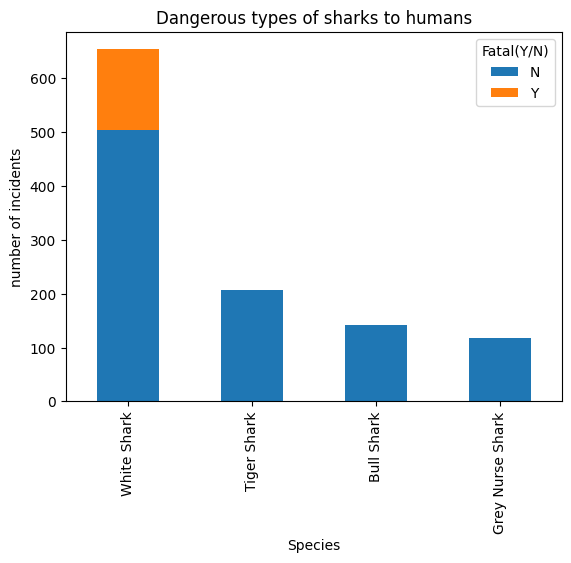

In [116]:
#solution 1: Aggregate on Species in descending order and do a count (size in pandas), take top5 and plot
tussen_resultaat = (prep1
 .groupby(['Species','Fatal(Y/N)'])
 .size()
 .sort_values(ascending=[False])
 #.reset_index(name='count')
 .head(5)
)

ds_ready_for_plot = tussen_resultaat.unstack(level=-1)


ds_ready_for_plot.plot(kind='bar',stacked=True
                       , title='Dangerous types of sharks to humans'
                       , ylabel='number of incidents')



Question 2: Are children more likely to be attacked by sharks?
Assumption: Categorize all left observations by Age group Adult vs Young and do a count. Create a new column based on this and use this in the final result
Data Cleansing: see below prep 2

Answer: Yes adults are attacked more than young people

In [ ]:
# data cleansing question 2

prep2 = prep1.copy()

# # prep2.info()
# (prep2.Age.unique())

#create ad
age_group = ['57', '11', '48', '18', '52', '15', '12', '32', '10', '21', '34',
       '30', '60', '33', '29', '54', '41', '37', '56', '19', '25', '69',
       '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24', '26',
       '49', '22',  '31', '17', '40', '13', '42', '50',
       '82', '73', '20s', '68', '51', '39', '58', 'Teen', '47',
       '61', '65', '36', '66', '43', '60s', '9', '72', '59', '27',
       '64', '23', '71', '44', '62', '63', '70', '18 months', '53', '30s',
       '50s', '77', '74', '28 & 26', '86', '18 or 20',
       '46 & 34', '28, 23 & 30', '36 & 26',
       '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', ' 28',
       '20?', "60's", '32 & 30', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '? & 19', '25 to 35',
       '23 & 26', '1', '(adult)', '33 & 37', '25 or 28',
       '37, 67, 35, 27,  ? & 27', '21, 34,24 & 35', '30 & 32', '50 & 30',
       '17 & 35', 'X', '"middle-age"',  '34 & 19', '33 & 26',
       'MAKE LINE GREEN', ' 43', '81', '"young"',
       '78', 'young',
       '36 & 23', '31 or 33'
]


def fill_age_group(col):
     if col in age_group:
         return 'Adult'
     else:
        return 'Young'


prep2['Age_group'] = prep2['Age'].apply(fill_age_group)


<Axes: title={'center': 'shark attack Age group'}, xlabel='Age group', ylabel='number of incidents'>

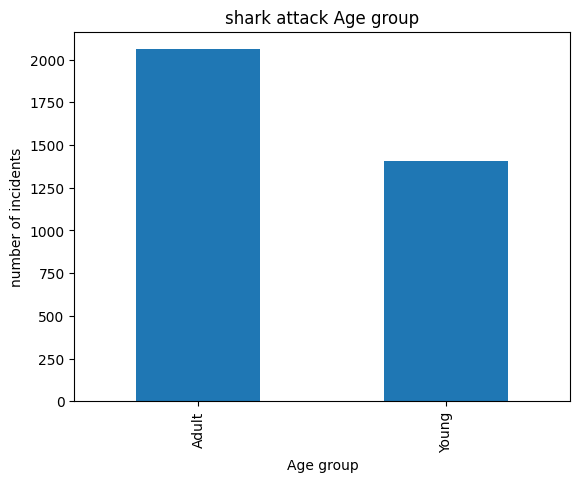

In [ ]:
#Solution 2
# aggregate on age do a count in descending order. take top 6 and plot
(prep2
 .groupby('Age_group')
 .size()
 .sort_values(ascending=[False])
 .head(10)
 .plot(kind = "bar", title='shark attack Age group', ylabel='number of incidents', xlabel='Age group')
)

Question 3: Are shark attacks where sharks were provoked more or less dangerous?
Assumption: In this case we need to look more variables. I would do count by Typeand Fatal (Y/N) and take the top 5 and plot it
Answer: Shark are Unprovoked more dangerous

In [ ]:
prep3 = prep2.copy()

<Axes: title={'center': 'Dangerous shark attacks provoked or unprovoked'}, xlabel='Type,Fatal(Y/N)', ylabel='number of incidents'>

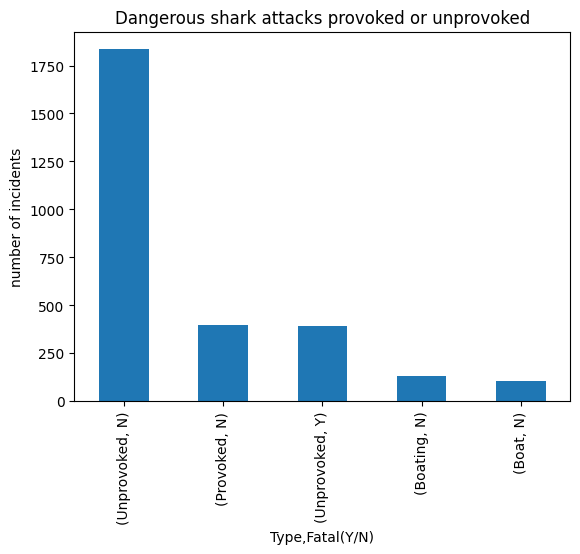

In [ ]:
#solution 3
# aggregate on type and injury do a count in descending order. take top 6 and plot
(prep3
 .groupby(['Type', 'Fatal(Y/N)'])
 .size()
 .sort_values(ascending=[False])
 .head(5)
 .plot(kind = 'bar', title="Dangerous shark attacks provoked or unprovoked", ylabel="number of incidents")
)

Question4: Are certain activities more likely to result in a shark attack?
Assumption: Take activity and Type and do count.
Datacleansing: replace values of activity and categorize
Answer: Swimming and Surfing, fishing and diving are all dangerous unprovoked.

In [ ]:
prep4 = prep3.copy()

 # prep2.info()
#(prep4.Activity.unique())

In [ ]:


prep4.dropna(subset=['Activity'], inplace = True)


#step 2 replace values for right category
prep4.loc[prep4['Activity'].str.contains('paddling', case=False), 'Activity' ] = 'Paddling'
prep4.loc[prep4['Activity'].str.contains('surfing', case=False), 'Activity' ] = 'Surfing'
prep4.loc[prep4['Activity'].str.contains('diving', case=False), 'Activity' ] = 'Diving'
prep4.loc[prep4['Activity'].str.contains('swimming', case=False), 'Activity' ] = 'Swimming'
prep4.loc[prep4['Activity'].str.contains('fishing', case=False), 'Activity' ] = 'Fishing'

(prep4.Activity.unique())


array(['Paddling', 'Surfing', 'Diving', 'Swimming', 'Fishing', 'Walking',
       'Feeding sharks', 'Paddle-skiing', 'Body boarding',
       'Stand-Up Paddleboarding', 'Wading', 'Cleaning fish', 'Snorkeling',
       '2 boats capsized', 'Night bathing', 'Kayaking', 'SUP',
       'Touching a shark', 'Attempting to lasso a shark', 'Photo shoot',
       'Washing hands', 'Grabbing shark for a selfie', 'Tagging sharks',
       'Surf skiing ', 'Floating', 'SUP Foil boarding', 'Lobstering',
       'Floating in tube', 'Standing', 'Teasing a shark', 'Surf-skiing',
       'Feeding stingrays?', 'Paddle boarding', 'Treading water',
       'Body boarding ', 'Playing in the water', 'Body Boarding',
       'Boogie boarding', 'Playing', 'Attempting to rescue a shark',
       'Photographing the shark', 'Standing / Snorkeling',
       'Hand feeding sharks', 'Sitting in the water',
       'Transatlantic Rowing', 'Rowing', 'Filming',
       'Standing in inner tube', 'Kayaking ', 'Feeding fish',
       'Kite

<Axes: title={'center': 'Shark attack by activity and type'}, xlabel='Activity,Type', ylabel='number of incidents'>

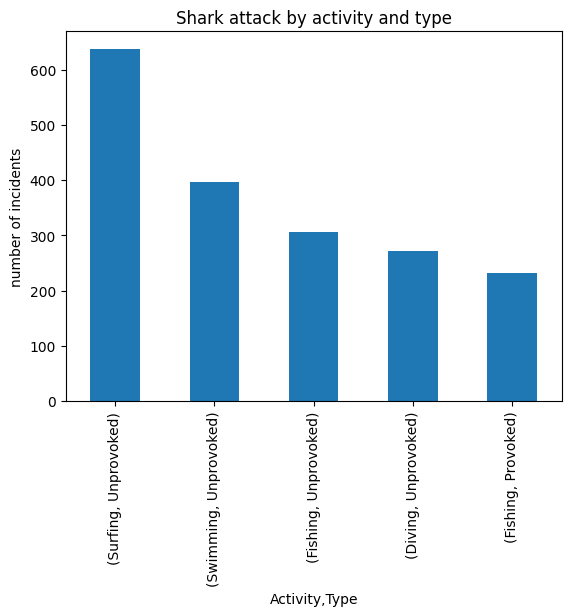

In [ ]:
#solution 4
# aggregate on type and injury do a count in descending order. take top 5 and plot
(prep4
 .groupby(['Activity', 'Type'])
 .size()
 .sort_values(ascending=[False])
 .head(5)
 .plot(kind = 'bar', title="Shark attack by activity and type", ylabel="number of incidents")
)